In [107]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

## Première étape : Décroissance radioactive et résolution d’équations différentielles

1. Analytic solution $P = P_0\exp(-\alpha t)$

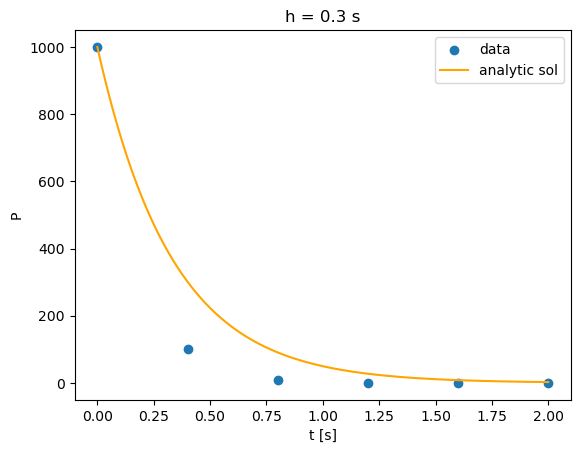

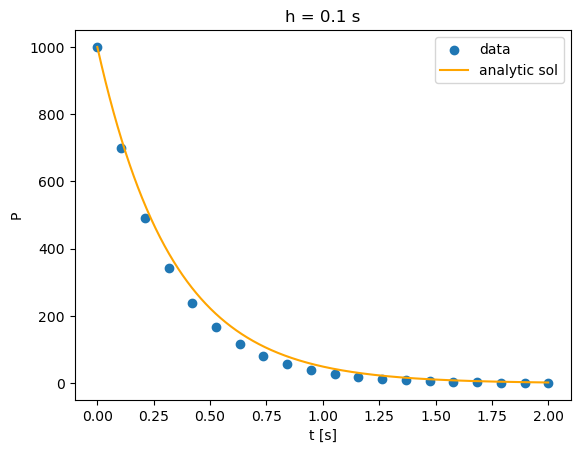

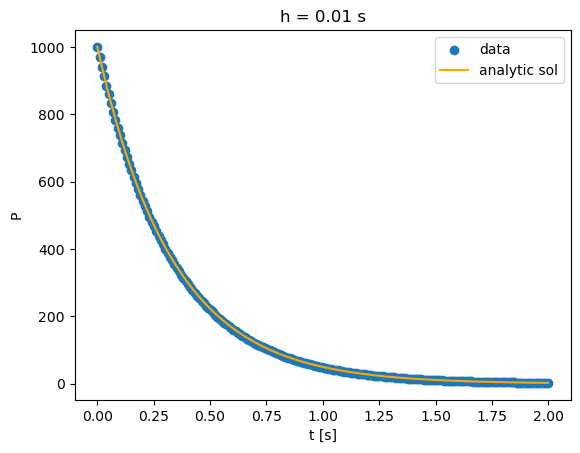

In [108]:
alpha = 3 # s^-1
P_0 = 1000

max_t = 2.0

# analytical solution
t_theo = np.linspace(0,max_t, 1000)
P_theo = P_0*np.exp(-alpha*t_theo)

delta_ts = [0.3, 0.1, 0.01]

for dt in delta_ts:

    N_steps = int(max_t/dt)
    t = np.linspace(0, max_t, N_steps)

    P = np.zeros(len(t)) # P
    #dP = np.zeros(len(t)) # dP/dt

    P[0] = P_0
    #dP[0] = -alpha*P_0

    for i in range(len(t)-1):
        P[i+1] = P[i] - alpha*P[i]*dt

    plt.scatter(t, P, label="data")
    plt.plot(t_theo, P_theo, color="orange", label="analytic sol")

    plt.ylabel("P")
    plt.xlabel("t [s]")
    plt.title(f"h = {dt} s")
    plt.legend()
    plt.show()

## Deuxième étape : Radioactivité Atmosphérique du 210Pb

T_x : half life of species x

100
100


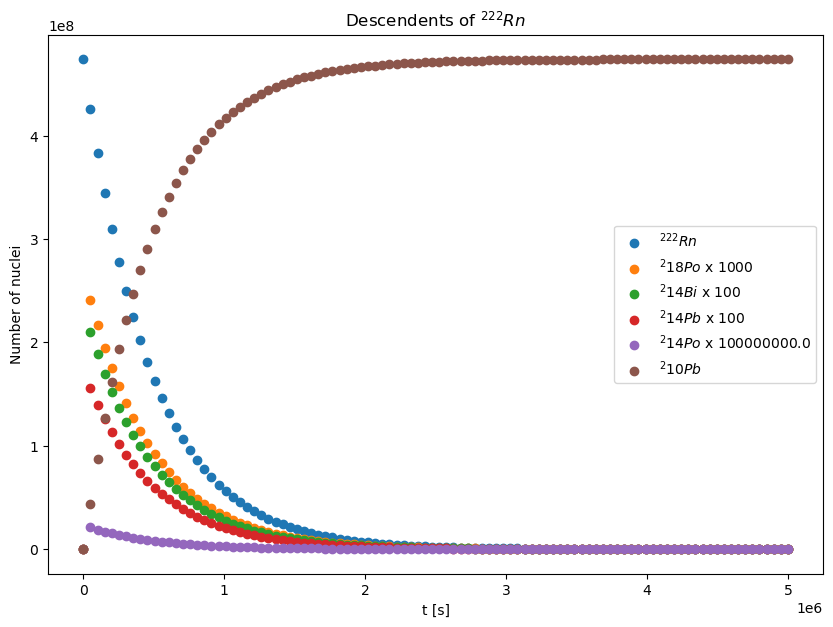

In [109]:
# 1.
data1 = pd.read_csv("Data_Rn_222.csv")

#print(data1)

# 2.



# ommit first element
#t_rad = data1["t"][1:-1].to_numpy()
t_rad = np.array([float(data1["t"][i]) for i in range(1, len(data1["t"]))])
#print(t_rad) # all good
print



Rn222 = np.array([float(data1["222Rn"][i]) for i in range(1, len(data1["222Rn"]))]) #data1["222Rn"][1:-1].to_numpy()
print(len(Rn222))
#print(Rn222)

Po218_coeff = 1000 #data1["218Po"][0]
#print(Po218_coeff)
Po218 = np.array([float(data1["218Po"][i]) for i in range(1, len(data1["218Po"]))])

# they are read as strings
print(len(Po218))

Bi214_coeff = 100 #data1["214Bi"][0]
#print(Bi214_coeff)
Bi214 = np.array([float(data1["214Bi"][i]) for i in range(1, len(data1["214Bi"]))]) #data1["214Bi"][1:-1].to_numpy()

Pb214_coeff = 100 #data1["214Pb"][0]
#print(Pb214_coeff)
Pb214 =  np.array([float(data1["214Pb"][i]) for i in range(1, len(data1["214Pb"]))]) #data1["214Pb"][1:-1].to_numpy()

Po214_coeff = 1e8 ##data1["214Pb"][0]
#print(Po214_coeff)
Po214 = np.array([float(data1["214Po"][i]) for i in range(1, len(data1["214Po"]))]) #data1["214Po"][1:-1].to_numpy()

#Pb210_coeff = data1["210Pb"][0]
#print(Pb210_coeff)
Pb210 = np.array([float(data1["210Pb"][i]) for i in range(1, len(data1["210Pb"]))]) #data1["210Pb"][1:-1].to_numpy()


# 3.

plt.figure(figsize=(10, 7))

plt.scatter(t_rad, Rn222, label="$^{222}Rn$")
plt.scatter(t_rad, Po218, label=f"$^{218}Po$ x {Po218_coeff}")
plt.scatter(t_rad, Bi214, label=f"$^{214}Bi$ x {Bi214_coeff}")
plt.scatter(t_rad, Pb214, label=f"$^{214}Pb$ x {Pb214_coeff}")
plt.scatter(t_rad, Po214, label=f"$^{214}Po$ x {Po214_coeff}")
plt.scatter(t_rad, Pb210, label=f"$^{210}Pb$")

plt.ylabel("Number of nuclei")
plt.xlabel("t [s]")
plt.legend()
plt.title("Descendents of $^{222}Rn$")

plt.show()
#plt.xlim((0, 5e6))

## Evolution de l’activité des noyaux en fonction du temps

             t   222Rn  218Po  214Bi  214Pb  214Po 210Pb  Unnamed: 7
0          (s)    (bq)   (bq)   (bq)   (bq)   (bq)  (bq)         NaN
1          0.0  1000.7    0.0    0.0    0.0    0.0   0.0         NaN
2      50505.1   899.5  900.0  904.4  907.7  907.7   0.0         NaN
3     101010.1   808.5  809.0  813.0  815.9  815.9   0.0         NaN
4     151515.2   726.8  727.2  730.7  733.4  733.4   0.0         NaN
..         ...     ...    ...    ...    ...    ...   ...         ...
96   4797979.8     0.0    0.0    0.0    0.0    0.0   0.0         NaN
97   4848484.8     0.0    0.0    0.0    0.0    0.0   0.0         NaN
98   4898989.9     0.0    0.0    0.0    0.0    0.0   0.0         NaN
99   4949494.9     0.0    0.0    0.0    0.0    0.0   0.0         NaN
100  5000000.0     0.0    0.0    0.0    0.0    0.0   0.0         NaN

[101 rows x 8 columns]


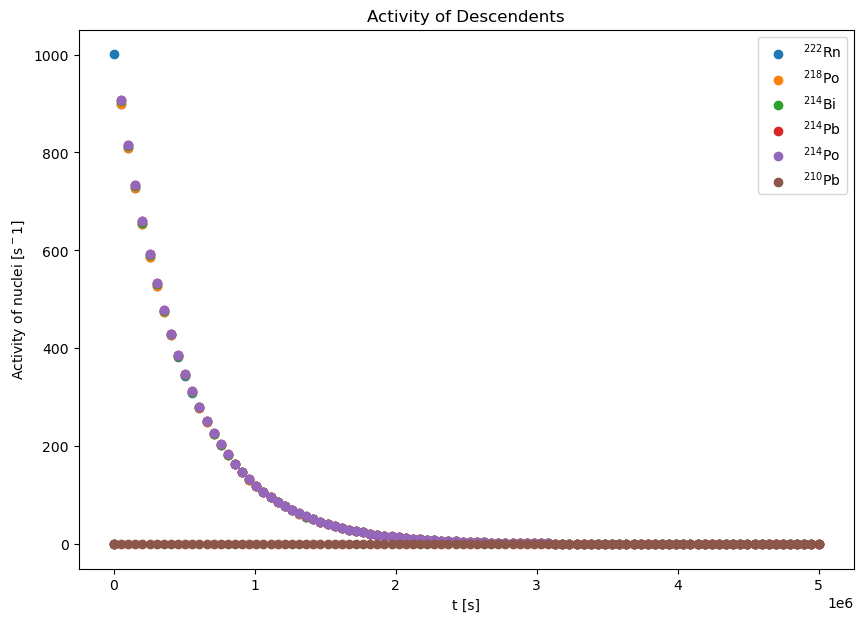

In [110]:
# the string values were likely caused by the header rows that had string format
# skipping them circumvents the problem
#too problematic
#data2 = pd.read_csv("Data_Activite_Rn_222.csv", skiprows=[0, 1], names=["t","222Rn","218Po","214Bi","214Pb","214Po","210Pb"])
data2 = pd.read_csv("Data_Activite_Rn_222.csv")

print(data2)

#t_act = data2["t"].to_numpy()
#print(t_act)

# something is acting up, the first column is ignored apparently
# it seems time array is exactly the same as previous so I will just copy it, no time to fix
#t_act = t_rad
#print(len(t_act))

t_Act = np.array([float(data2["t"][i]) for i in range(1, len(data2["t"]))]) #data2["222Rn"].to_numpy()
#print(t_Act)
#print(len(t_Act))


Rn222_Act = np.array([float(data2["222Rn"][i]) for i in range(1, len(data2["222Rn"]))]) #data2["222Rn"].to_numpy()
#print(Rn222_Act[3])
#print(len(Rn222_Act))

Po218_Act = np.array([float(data2["218Po"][i]) for i in range(1, len(data2["218Po"]))]) #data2["218Po"].to_numpy()
#print(Po218_Act)

Bi214_Act = np.array([float(data2["214Bi"][i]) for i in range(1, len(data2["214Bi"]))]) #data1["214Bi"][1:-1].to_numpy()

Pb214_Act =  np.array([float(data2["214Pb"][i]) for i in range(1, len(data2["214Pb"]))]) #data1["214Pb"][1:-1].to_numpy()

Po214_Act = np.array([float(data2["214Po"][i]) for i in range(1, len(data2["214Po"]))]) #data1["214Po"][1:-1].to_numpy()

Pb210_Act = np.array([float(data2["210Pb"][i]) for i in range(1, len(data2["210Pb"]))]) #data1["210Pb"][1:-1].to_numpy()


# 3. 

plt.figure(figsize=(10,7))
plt.scatter(t_Act, Rn222_Act, label="$^{222}$Rn")
plt.scatter(t_Act, Po218_Act, label="$^{218}$Po")
plt.scatter(t_Act, Bi214_Act, label="$^{214}$Bi") 
plt.scatter(t_Act, Pb214_Act, label="$^{214}$Pb")
plt.scatter(t_Act, Po214_Act, label="$^{214}$Po")
plt.scatter(t_Act, Pb210_Act, label="$^{210}$Pb")

plt.xlabel("t [s]")
plt.ylabel("Activity of nuclei [s$^-1$]")
plt.title("Activity of Descendents")
plt.legend()

plt.show()



We notice that the the short half life nuclei has nearly the same activity. $^{210}Pb$, having the longest half-life possesses the lowest activity, indistinguishible from zero at this scale

## 4. Adjustement d'activité

(a) $A_{222}(t) = \lambda_{222}N_{222}(t) = \lambda_{222}N_0e^{-\lambda_{222}t}$

[37.03057018 27.02361845]


/Users/hervesv/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


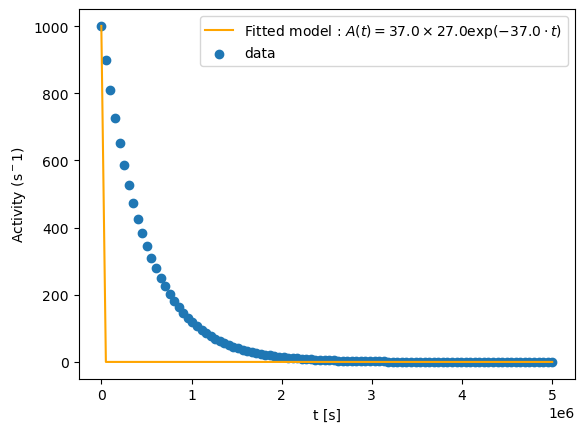

In [111]:
def act_model(t, lmda, N0):
    return lmda*N0*np.exp(-lmda*t)

def act_model2():
    return 0

popt, cov = curve_fit(act_model, xdata=t_Act, ydata=Rn222_Act)

print(popt)

plt.plot(t_Act, act_model(t_Act, popt[0], popt[1]), color="orange", label=fr"Fitted model : $A(t) = {popt[0]:.3}\times{popt[1]:.3}\exp(-{popt[0]:.3}\cdot t)$")
plt.scatter(t_Act, Rn222_Act, label="data")


plt.ylabel("Activity (s$^-1$)")
plt.xlabel("t [s]")
plt.legend()
plt.show()

# there is an error somewhere, the fit is terrible
